In [3]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import pandas as pd
import seaborn as sns
import IPython
import numpy as np
import sweetviz as sv

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from xgboost               import XGBRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier


set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24




Pandas   1.2.5
Sklearn  0.24.2


IMPORTING DATA

In [5]:
data = pd.read_csv('climate.csv')
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [6]:
data = data.drop(['Date Time'], axis =1)
data.sample(5)







,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
273129,1004.92,9.57,282.33,4.34,69.78,11.94,8.33,3.61,5.17,8.29,1234.31,2.82,4.12,27.24
318343,987.82,-3.63,270.48,-4.17,96.00,4.67,4.48,0.19,2.83,4.54,1274.55,0.59,0.88,73.00
285371,988.64,18.27,292.38,6.65,46.55,21.03,9.79,11.24,6.18,9.90,1177.35,2.23,4.24,29.00
267659,978.72,6.19,281.08,1.13,69.90,9.49,6.63,2.86,4.22,6.77,1217.36,2.10,3.08,232.80
310762,986.44,4.00,278.24,-0.01,75.00,8.14,6.10,2.03,3.86,6.19,1236.95,1.96,3.87,179.10


DATA PREPROCESSING


In [9]:
scaler = StandardScaler()
scaled_data =  scaler.fit_transform(data)

normalizer = PowerTransformer(method='yeo-johnson')
normalized_data = normalizer.fit_transform(scaled_data)



<AxesSubplot:>

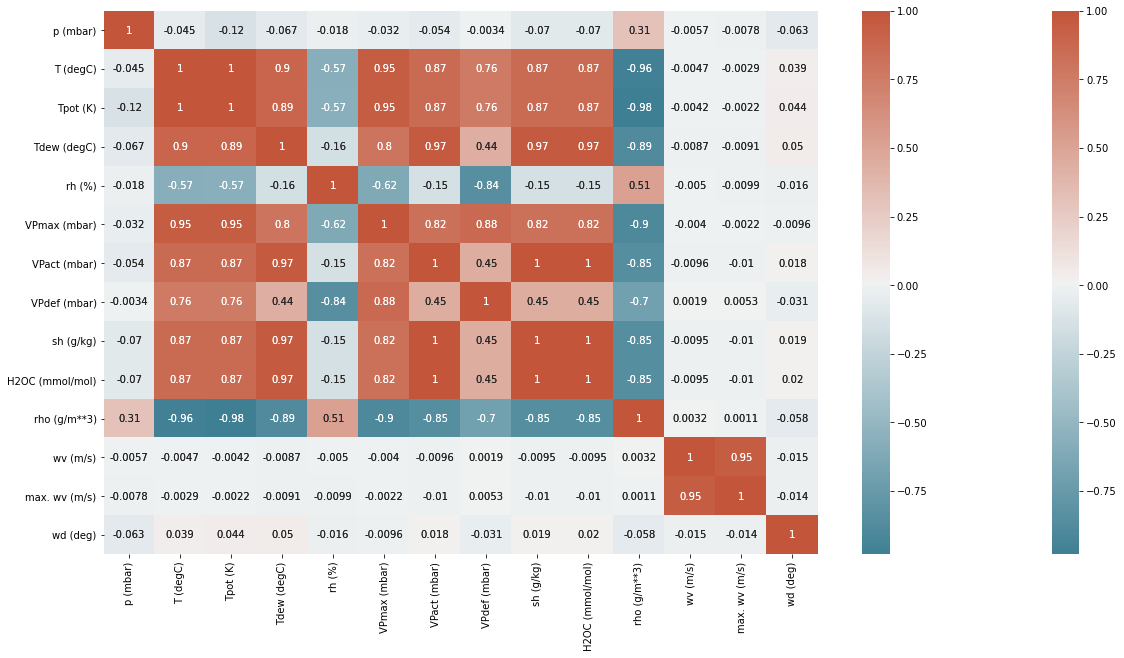

In [24]:
 corr = data.corr()
 plt.subplots(figsize=(20,10))
 sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True))
 sb.heatmap(corr, xticklabels=corr.columns,
             yticklabels=corr.columns, 
             annot=True,
             cmap=sb.diverging_palette(220, 20, as_cmap=True))

In [42]:
normalized_data 

array([[ 0.8762224 , -2.06778398, -2.10767285, ..., -0.68386866,
        -0.7273166 , -0.4046773 ],
       [ 0.88295278, -2.11376456, -2.15256732, ..., -0.86409488,
        -0.82183653, -0.57357415],
       [ 0.87756818, -2.12555378, -2.16407677, ..., -1.16740325,
        -1.14534509, -0.18880344],
       ...,
       [ 1.3280293 , -1.49441617, -1.57601511, ..., -0.65460195,
        -0.6320872 ,  0.37146793],
       [ 1.32663804, -1.62071535, -1.69958541, ..., -0.41251246,
        -0.57076442,  0.52186629],
       [ 1.3280293 , -1.6903408 , -1.76652258, ..., -0.56646894,
        -0.6473719 , -0.02856744]])

JONS'S LOOP

In [10]:
def pairing(data, seq_len = 6):
    x = []
    y = []
    for i in range(0, (normalized_data.shape[0]-1) // seq_len, seq_len + 1): #creating for loop for the sequence
        seq = np.zeros((seq_len, normalized_data.shape[1])) 
        for j in range(seq_len):  #iterating through the sequence
            seq[j] = data[i+j]
        x.append(seq)
        y.append(data[i+seq_len,1])  # append 
    return np.array(x), np.array(y)
x, y = pairing(normalized_data)


print(normalized_data.shape)
print(x.shape)
print(y.shape)
        

(420551, 14)
(10013, 6, 14)
(10013,)


In [54]:
normalized_data.shape 

(420551, 14)

SPLITTING DATA

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)  
print(y_test.shape)                                    

(8010, 6, 14)
(8010,)
(2003, 6, 14)
(2003,)


CHANGING 3D ARRAY INTO 2D

In [9]:
nsamples, nx, ny = X_train.shape
X_train_d2 = X_train.reshape((nsamples,nx*ny))
X_train_d2.shape

(8010, 84)

In [10]:
nsamples, nx, ny = X_test.shape
X_test_d2 = X_test.reshape((nsamples,nx*ny))
X_test_d2.shape

(2003, 84)

RandomForestRegressor

In [11]:
Regression_models = {
  "Decision Tree": DecisionTreeRegressor(),
  "Extra Trees":   ExtraTreesRegressor(n_estimators=100),
  "Random Forest": RandomForestRegressor(n_estimators=100),
  "AdaBoost":      AdaBoostRegressor(n_estimators=100),
  "Skl GBM":       GradientBoostingRegressor(n_estimators=100),
  "XGBoost":       XGBRegressor(n_estimators=100),
  "LightGBM":      LGBMRegressor(n_estimators=100),
  "CatBoost":      CatBoostRegressor(n_estimators=100),
}

TESTING BEST MODELS

In [12]:
rang = abs(y_train.max()) + abs(y_train.min())
results = pd.DataFrame({'Model': [], 'MSE': [], 'MAB': [], " % error": [], 'Time': []})

for model_name, model in Regression_models.items():
    
    start_time = time.time()
    model.fit(X_train_d2, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(X_test_d2)
    
    results = results.append({"Model":    model_name,
                              "MSE": metrics.mean_squared_error(y_test, pred),
                              "MAB": metrics.mean_absolute_error(y_test, pred),
                              " % error": metrics.mean_squared_error(y_test, pred) / rang,
                              "Time":     total_time},
                              ignore_index=True)
### END SOLUTION


results_ord = results.sort_values(by=['MSE'], ascending=True, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['MSE', 'MAE'], vmin=0, vmax=100, color='#5fba7d')

print(results_ord)


print(y_train.max())
print(y_train.min())
print(y_test[3])
print(Regression_models['Random Forest'].predict(X_test_d2)[3])

Learning rate set to 0.325273
0:	learn: 0.7285377	total: 150ms	remaining: 14.9s
1:	learn: 0.5213009	total: 162ms	remaining: 7.93s
2:	learn: 0.3769421	total: 175ms	remaining: 5.67s
3:	learn: 0.2756884	total: 187ms	remaining: 4.49s
4:	learn: 0.2099828	total: 198ms	remaining: 3.77s
5:	learn: 0.1650471	total: 208ms	remaining: 3.25s
6:	learn: 0.1381534	total: 218ms	remaining: 2.9s
7:	learn: 0.1223326	total: 229ms	remaining: 2.63s
8:	learn: 0.1118985	total: 241ms	remaining: 2.44s
9:	learn: 0.1057547	total: 251ms	remaining: 2.26s
10:	learn: 0.0986925	total: 260ms	remaining: 2.11s
11:	learn: 0.0943315	total: 271ms	remaining: 1.99s
12:	learn: 0.0907375	total: 280ms	remaining: 1.88s
13:	learn: 0.0891631	total: 292ms	remaining: 1.79s
14:	learn: 0.0871385	total: 301ms	remaining: 1.71s
15:	learn: 0.0857191	total: 311ms	remaining: 1.63s
16:	learn: 0.0850443	total: 322ms	remaining: 1.57s
17:	learn: 0.0838980	total: 333ms	remaining: 1.52s
18:	learn: 0.0826337	total: 347ms	remaining: 1.48s
19:	learn: 0

TESTING DATA WITHOUT NORMALIZATION

In [31]:
def pairing(data, seq_len = 6):
    x = []
    y = []
    for i in range(0, (data.shape[0]-1) // seq_len, seq_len + 1): #creating for loop for the sequence
        seq = np.zeros((seq_len, data.shape[1])) 
        for j in range(seq_len):  #iterating through the sequence
            seq[j] = data.values[i+j]
        x.append(seq)
        y.append(data['T (degC)'][i+seq_len])  # append 
    return np.array(x), np.array(y)
x, y = pairing(data)

print('3d data')
print(data.shape)
print(x.shape)
print(y.shape)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


 
nsamples, nx, ny = X_train.shape
X_train_d2_original = X_train.reshape((nsamples,nx*ny))       

nsamples, nx, ny = X_test.shape
X_test_d2_original = X_test.reshape((nsamples,nx*ny))






print('2d data')
print(data.shape)
print(X_train_d2_original.shape)
print(X_test_d2_original.shape)



3d data
(420551, 14)
(10013, 6, 14)
(10013,)
2d data
(420551, 14)
(8010, 84)
(2003, 84)


In [32]:
rang = abs(y_train.max()) + abs(y_train.min())
results = pd.DataFrame({'Model': [], 'MSE': [], 'MAB': [], " % error": [], 'Time': []})

for model_name, model in Regression_models.items():
    
    start_time = time.time()
    model.fit(X_train_d2_original, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(X_test_d2_original)
    
    results = results.append({"Model":    model_name,
                              "MSE": metrics.mean_squared_error(y_test, pred),
                              "MAB": metrics.mean_absolute_error(y_test, pred),
                              " % error": metrics.mean_squared_error(y_test, pred) / rang,
                              "Time":     total_time},
                              ignore_index=True)
### END SOLUTION


results_ord = results.sort_values(by=['MSE'], ascending=True, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['MSE', 'MAE'], vmin=0, vmax=100, color='#5fba7d')

print(results_ord)


print(y_train.max())
print(y_train.min())
print(y_test[3])
print(Regression_models['Random Forest'].predict(X_test_d2_original)[3])

Learning rate set to 0.325273
0:	learn: 6.1309198	total: 10.6ms	remaining: 1.05s
1:	learn: 4.3874872	total: 21.5ms	remaining: 1.05s
2:	learn: 3.1763414	total: 31.3ms	remaining: 1.01s
3:	learn: 2.3234387	total: 40.4ms	remaining: 970ms
4:	learn: 1.7642423	total: 51ms	remaining: 968ms
5:	learn: 1.3963807	total: 60.8ms	remaining: 953ms
6:	learn: 1.1700903	total: 70.9ms	remaining: 942ms
7:	learn: 1.0379479	total: 80.4ms	remaining: 924ms
8:	learn: 0.9479446	total: 89.6ms	remaining: 906ms
9:	learn: 0.8877204	total: 99.9ms	remaining: 899ms
10:	learn: 0.8398292	total: 110ms	remaining: 887ms
11:	learn: 0.8099801	total: 120ms	remaining: 878ms
12:	learn: 0.7823521	total: 130ms	remaining: 872ms
13:	learn: 0.7587845	total: 141ms	remaining: 863ms
14:	learn: 0.7393891	total: 150ms	remaining: 852ms
15:	learn: 0.7207194	total: 160ms	remaining: 841ms
16:	learn: 0.7105358	total: 171ms	remaining: 834ms
17:	learn: 0.7000144	total: 181ms	remaining: 826ms
18:	learn: 0.6891021	total: 191ms	remaining: 815ms
19: